# Please you should change the path before running this code!

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import IPython

#### First let us define the path to the training and test data sets. Just to be absolutely sure, we will check if the path is correct, that the file exists in the path we provided. This is done using the os.path.exists function.

In [3]:
training_data_filepath='/media/ghomsi/SERGUEI/Big_Data/bigdata_aims_senegal/titanic/data/train.csv'
test_data_filepath='/media/ghomsi/SERGUEI/Big_Data/bigdata_aims_senegal/titanic/data/test.csv'
print 'The path to the training data set is correct: ', os.path.exists(training_data_filepath)
print 'The path to the test data set is correct: ', os.path.exists(test_data_filepath)

The path to the training data set is correct:  True
The path to the test data set is correct:  True


#### Now that we know the files exist, let us first load the training data set to a pandas DataFrame. This DataFrame is just like a table, but with many powerful methods to make analysis on the table very easy. Read more about pandas DataFrame here http://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [4]:
df_training = pd.read_csv(training_data_filepath)

In [5]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)

#### From the above output we see that, the following features have at least one data missing
* 'Age'
* 'Cabin'
* 'Embarked'
* 'Name'
* 'Sex'
* 'Ticket'
##### Question: Why?

#### In principle we should try to fill these missing data through interpolation, mean or any other intelligent method. Bur for this excersise let us drop all  the above features with missing data.
We use the pandas drop method to drop the columns, hence axis=1, from the training DataFrame. The resulting DataFrame would be a clean training data set.

In [6]:
df_training_clean = df_training.drop(['Age','Cabin','Embarked','Name','Sex','Ticket'],axis=1)

#### Our goal here is to train a machine to learn the relationship between different features about the titanic passangers  and their survival chance. Therefore out target is the column * 'Survived' *. We want to drop this column from our DataFrame assign 
The pop method drops the Survived column from the data frame and assigns it to a variable target

In [7]:
target = df_training_clean.pop('Survived') 

In [8]:
df_training_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(1), int64(4)

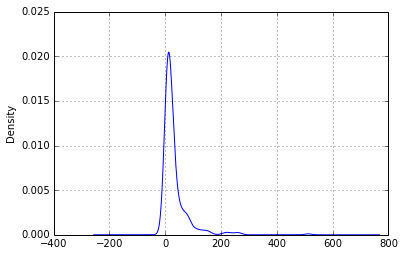

In [9]:
%matplotlib inline
df_training_clean['Fare'].plot(kind='kde')

#### Now let us train a decision tree algorithm using the training data and the corresponding target. We will use the scikit-learn (sklearn) python package. Scikit expects a pure numpy array so we should convert our training DataFrame to numpy array as follows.

In [10]:
array_training_clean=df_training_clean.values
array_target=target.values
#the shape method tells us about the rank of the array
print 'The shape of training array is: ',array_training_clean.shape 
print 'The shape of the target array is: ',array_target.shape 

The shape of training array is:  (891, 5)
The shape of the target array is:  (891,)


#### Now the training part -  it takes only just three lines!!! 

In [11]:
from sklearn import tree #import tree algorithm from scikit-learn
#Intitialize the DecisionTreeClassifier algorithm with optional parameters 
classifier = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=4) 
#use the initialized tree to learn the relationship between 
#known passanger information, features, and know state of survival 
classifier.fit(array_training_clean, array_target)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=4, max_features=None, min_density=None,
            min_samples_leaf=5, min_samples_split=2, random_state=None,
            splitter='best')

#### Let us see what the machine will predict 

In [12]:
#The variable classifier in the above cell contains a tree which has a 
#knowledge of how passengers features are related to their survival.

#Just to have insight, let's see how our decision tree predicts 
print "First 5 training target"
print array_target[0:5]
print "Prediction on first 5 training Rows"
print classifier.predict(array_training_clean[0:5,:])

# We can see the score, the efficiency of the training as follows
print("Training Score: ", classifier.score(array_training_clean, array_target))
#Since our analysis is simple, we did not attempt to fill the missing data etc.  
#the score score is low, in principle with a proper data cleaning etc. 
# we could get the maximim training score of 1. 

First 5 training target
[0 1 1 1 0]
Prediction on first 5 training Rows
[0 1 0 1 0]
('Training Score: ', 0.734006734006734)


In [13]:
import StringIO, pydot 
dot_data = StringIO.StringIO() 
tree.export_graphviz(classifier, out_file=dot_data, feature_names=df_training.keys()) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("decision_tree_assg_serge.png") 

/usr/lib/python2.7/dist-packages/pyparsing.py:3546: DeprecationWarning: Operator '<<' is deprecated, use '<<=' instead
  ret << Group( Suppress(opener) + ZeroOrMore( ignoreExpr | ret | content ) + Suppress(closer) )
/usr/lib/python2.7/dist-packages/dot_parser.py:471: DeprecationWarning: Operator '<<' is deprecated, use '<<=' instead
  edge_point << Group( subgraph | graph_stmt | node_id ).setName('edge_point')
/usr/lib/python2.7/dist-packages/dot_parser.py:477: DeprecationWarning: Operator '<<' is deprecated, use '<<=' instead
  stmt_list << OneOrMore(stmt + Optional(semi.suppress()))


True

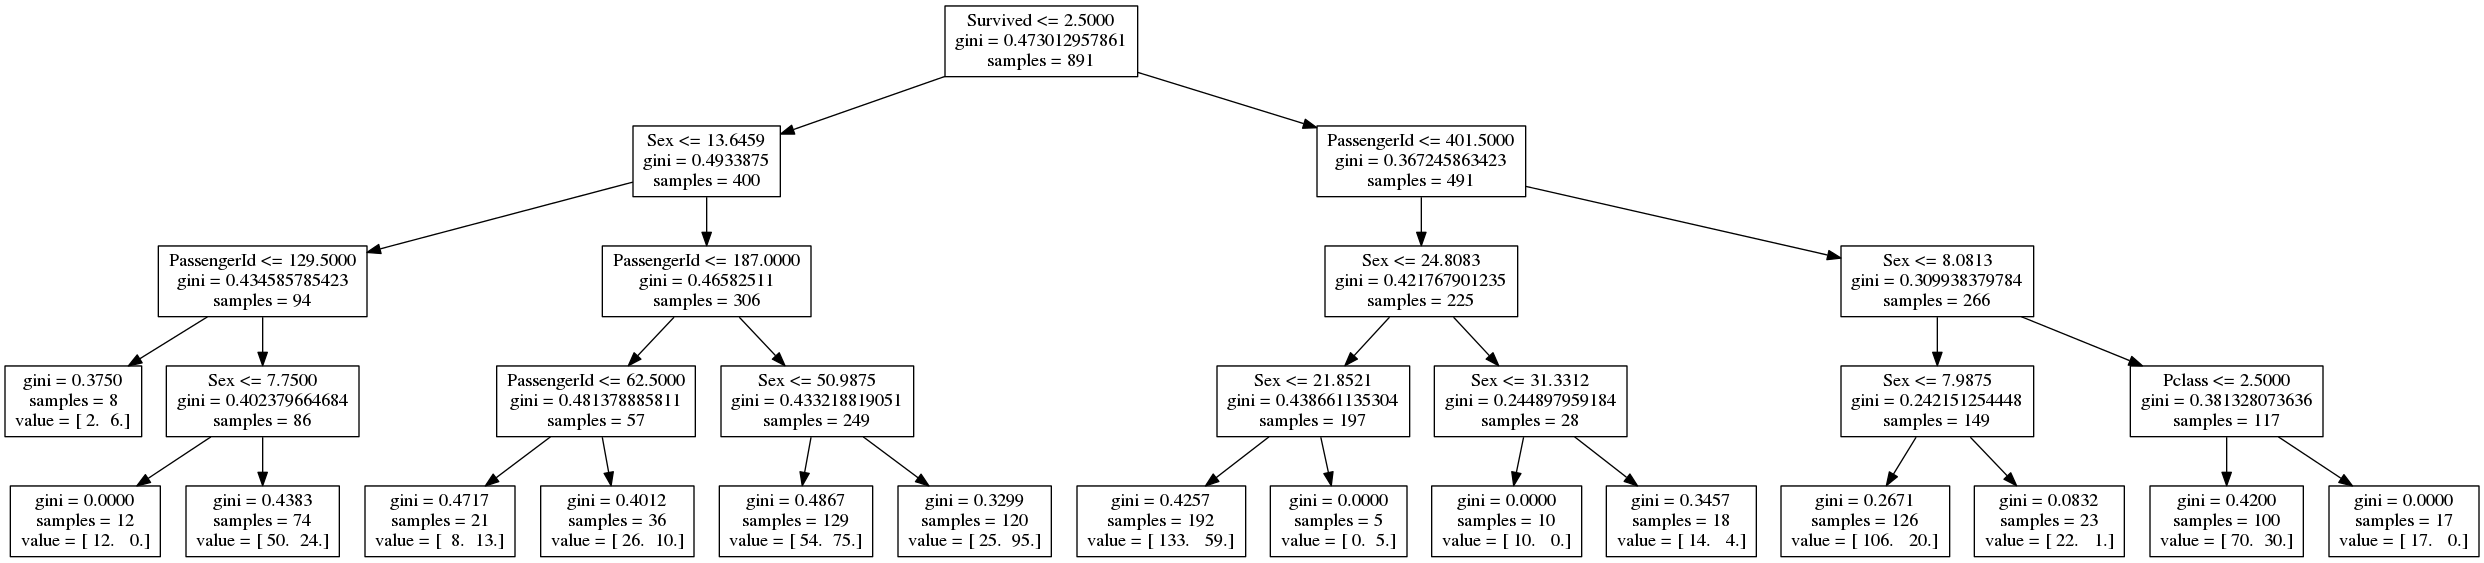

In [14]:
from IPython.core.display import Image 
Image(filename='decision_tree_assg_serge.png') 

#  Begin of Assignment_Serge_2 #

In [15]:
 df_test = pd.read_csv(test_data_filepath)

In [16]:
 df_test.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)

# refilling of missing data in Fare column

In [17]:
mean_fare_by_pclass = df_test[['Pclass','Fare']].groupby(['Pclass']).agg('mean')['Fare']

fare_given_pclass=df_test['Pclass'].apply(lambda x: mean_fare_by_pclass[x])

df_test['Fare'].fillna(fare_given_pclass,inplace=True)


In [18]:
 df_test.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)

# drop the columns cotain missing data

In [19]:
df_test_clean = df_test.drop(['Age','Cabin','Embarked','Name','Sex','Ticket'],axis=1)

# Convert the test DataFrame to numpy array 

In [20]:
 array_test_clean = df_test_clean.values

# prediction of survived 

In [21]:
survival_prediction = classifier.predict(array_test_clean) 

#  Save of Results in csv file

In [22]:
with open('prediction_sergei.csv', 'w') as csvfile:    
     for survived in survival_prediction:
          csvfile.write("{}\n".format(survived))

In [23]:
print survival_prediction

[0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0
 1 0 0 0 1 0 0 1 0 0 0]


#  Visualisation of results

(418,)


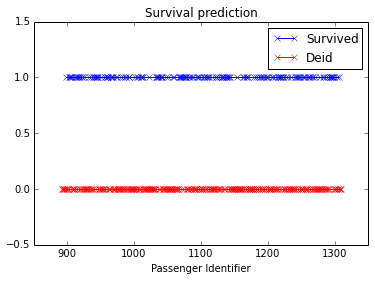

In [24]:
# Visualisation of results

print survival_prediction.shape
df_d = df_test_clean['PassengerId'].values
idx_d = np.where(survival_prediction==0)
idx_s= np.where(survival_prediction==1)
fig, ax = plt.subplots()
plt.ylim(-0.5,1.5)
plt.xlim(850,1350)
plt.plot(df_d[idx_s],survival_prediction[idx_s],marker='x',color='b', label = 'Survived')
plt.plot(df_d[idx_d],survival_prediction[idx_d],marker='x',color='r', label = 'Deid')
plt.title("Survival prediction")
plt.xlabel("Passenger Identifier")
plt.legend()


# Histogram of deid and survived by class

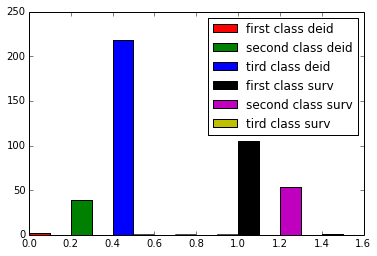

In [47]:
#fig, ax = plt.subplots()

#ax.set_xticks(range(113))
#ax.set_xticklabels(list(df1['Causes']), rotation='vertical')
plt.hist(survival_prediction[idx_cd1],color='r',label='first class deid')
plt.hist(survival_prediction[idx_cd2]+0.2, color= 'g',label = 'second class deid')
plt.hist(survival_prediction[idx_cd3]+0.4, color= 'b',label = 'tird class deid')
plt.hist(survival_prediction[idx_cs1],color='k',label='first class surv')
plt.hist(survival_prediction[idx_cs2]+0.2, color= 'm',label = 'second class surv')
plt.hist([1+0.4], color= 'y',label = 'tird class surv')
plt.legend()

# Percentage of Deid and Survived by using Tree

(-1.1055862671375778,
 1.0195496329176739,
 -1.0457152281200339,
 1.0000000379163354)

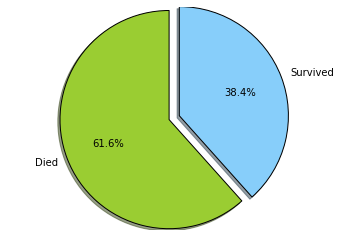

In [25]:
labels = 'Died', 'Survived'
sizes = [len(df_d[idx_d])*100/418, len(df_d[idx_s])*100/418]
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

In [26]:
idx_c1 = np.where(array_test_clean[:,1]==1)
idx_c2 = np.where(array_test_clean[:,1]==2)
idx_c3 = np.where(array_test_clean[:,1]==3)



In [27]:
len(df_d[idx_c1]), len(survival_prediction[idx_c1])

(107, 107)

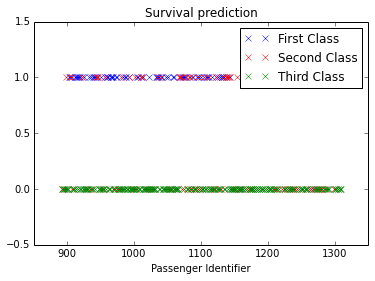

In [28]:
fig, ax = plt.subplots()
plt.ylim(-0.5,1.5)
plt.xlim(850,1350)
plt.plot(df_d[idx_c1],survival_prediction[idx_c1],linestyle='',marker='x',color='b', label = 'First Class')
plt.plot(df_d[idx_c2],survival_prediction[idx_c2],linestyle='', marker='x',color='r', label = 'Second Class')
plt.plot(df_d[idx_c3],survival_prediction[idx_c3],linestyle='',marker='x',color='g', label = 'Third Class')
plt.title("Survival prediction")
plt.xlabel("Passenger Identifier")
plt.legend()

# Percentage of Passenger by Class

(-1.0732482135461632,
 1.0077909953670305,
 -1.009242522980726,
 1.0701474915340836)

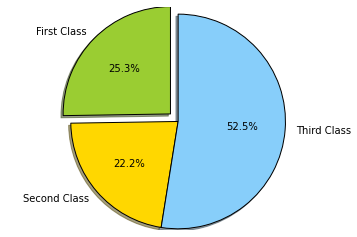

In [29]:
labels = 'First Class', 'Second Class', 'Third Class'
sizes = [len(df_d[idx_c1])*100/418, len(df_d[idx_c2])*100/418,len(df_d[idx_c3])*100/418]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

In [30]:
idx_cd1 = np.where((array_test_clean[:,1]==1) & (survival_prediction==0))
idx_cs1 = np.where((array_test_clean[:,1]==1) & (survival_prediction==1))
idx_cd2 = np.where((array_test_clean[:,1]==2) & (survival_prediction==0))
idx_cs2 = np.where((array_test_clean[:,1]==2) & (survival_prediction==1))
idx_cd3 = np.where((array_test_clean[:,1]==3) & (survival_prediction==0))
idx_cs3 = np.where((array_test_clean[:,1]==3) & (survival_prediction==1))


# Percentage of Deid by Class

(-1.0041642881109747,
 1.006053812837467,
 -1.0056643063535902,
 1.1000000000000001)

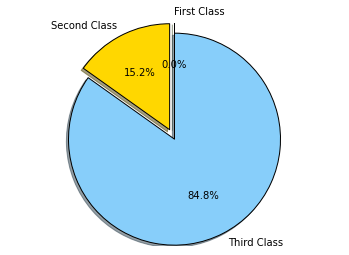

In [31]:
labels = 'First Class', 'Second Class', 'Third Class'
sizes = [len(df_d[idx_cd1])*100/len(df_d[idx_d]), len(df_d[idx_cd2])*100/len(df_d[idx_d]),len(df_d[idx_cd3])*100/len(df_d[idx_d])]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
#plt.title('Repartion of Deid passenger relative to Pclass')

# Percentage of Survived by class

(-1.0866025454744035,
 1.0866025572267612,
 -1.0500000218392445,
 1.0500000463812511)

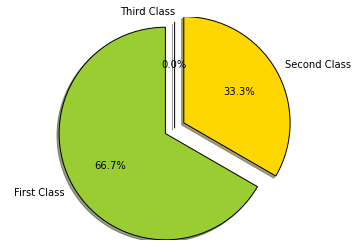

In [32]:
labels = 'First Class', 'Second Class', 'Third Class'
sizes = [len(df_d[idx_cs1])*100/len(df_d[idx_s]), len(df_d[idx_cs2])*100/len(df_d[idx_s]),len(df_d[idx_cs3])*100/len(df_d[idx_s])]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
#plt.title('Repartion of Deid passenger relative to Pclass')

In [35]:
df_d[idx_cs3]

array([], dtype=int64)

# Compare predictions from tree vs forest

In [33]:
#Compare predictions from tree vs forest 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)
model = model.fit(array_training_clean,array_target)
output = model.predict(array_test_clean)

#  visualisation of comparaison between tree and forest

(418,)
(418,)


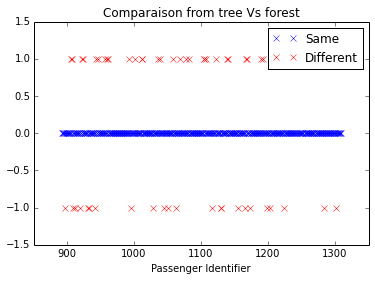

In [34]:
# visualisation of comparaison
print output.shape
print survival_prediction.shape
comp = survival_prediction-output
idx_t = np.where(comp==0)
idx_f= np.where(comp!=0)
fig, ax = plt.subplots()
plt.ylim(-1.5,1.5)
plt.xlim(850,1350)
plt.plot(df_d[idx_t],comp[idx_t],linestyle='',marker='x',color='b', label = 'Same')
plt.plot(df_d[idx_f],comp[idx_f],linestyle='',marker='x',color='r', label = 'Different')
plt.title("Comparaison from tree Vs forest")
plt.xlabel("Passenger Identifier")
plt.legend()

(-1.0866025501557415,
 1.0246609029442491,
 -1.1071058109404115,
 1.4999999999999738)

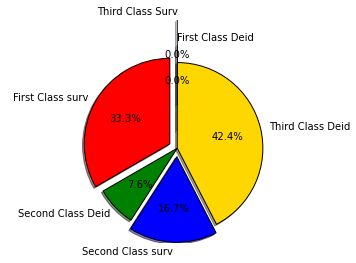

In [56]:
labels = 'First Class Deid', 'First Class surv', 'Second Class Deid', 'Second Class surv', 'Third Class Deid', 'Third Class Surv'
sizes =[len(df_d[idx_cd1])*100/len(df_d[idx_d]),len(df_d[idx_cs1])*100/len(df_d[idx_s]), len(df_d[idx_cd2])*100/len(df_d[idx_d]),len(df_d[idx_cs2])*100/len(df_d[idx_s]),len(df_d[idx_cd3])*100/len(df_d[idx_d]),len(df_d[idx_cs3])*100/len(df_d[idx_s])]
colors = ['yellowgreen', 'red', 'green', 'blue', 'gold', 'lightskyblue']
explode = (0.2, 0.1, 0, 0.1, 0, 0.5)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

# End of Assignment #